In [ ]:
# !pip install datasets
# !pip install accelerate -U
# !pip install soundfile
# !pip install --upgrade speechbrain
# !pip install transformers==4.38.2
# !pip install librosa

In [ ]:
from datasets import load_dataset, Audio
import librosa
import IPython as ipy
import matplotlib.pyplot as plt

In [ ]:
import huggingface_hub
huggingface_hub.login()

In [ ]:
dataset = load_dataset('mozilla-foundation/common_voice_13_0', 'ta', split='train', use_auth_token=True)
dataset

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 14129it [00:00, 141227.84it/s]
Reading metadata...: 43350it [00:00, 150741.16it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 11937it [00:00, 159225.19it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 11973it [00:00, 181886.15it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 16137it [00:00, 161355.15it/s]
Reading metadata...: 33880it [00:00, 170804.45it/s]
Reading metadata...: 51975it [00:00, 175431.67it/s]
Reading metadata...: 69519it [00:00, 174471.25it/s]
Reading metadata...: 87707it [00:00, 170796.00it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 5621it [00:00, 155537.26it/s]


Dataset common_voice_13_0 downloaded and prepared to /root/.cache/huggingface/datasets/mozilla-foundation___common_voice_13_0/ta/13.0.0/2506e9a8950f5807ceae08c2920e814222909fd7f477b74f5d225802e9f04055. Subsequent calls will reuse this data.


Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
    num_rows: 43350
})

In [ ]:
dataset = dataset.cast_column('audio', Audio(sampling_rate=16000))

In [ ]:
dataset[0]

{'client_id': 'a1252dd9f1a6c970da7b1a330ad07f9546330b5007dcd8db52ae3ac6774fb3d9150bc117b4df1944d7899d3ab8325cb03217c4797dec1627d1ad83eea7509d41',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/cd45e5a493beab30e15e143c06475a8bab34f392676f2a94a212624fbcd4fe7e/ta_train_0/common_voice_ta_26650298.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/cd45e5a493beab30e15e143c06475a8bab34f392676f2a94a212624fbcd4fe7e/ta_train_0/common_voice_ta_26650298.mp3',
  'array': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  'sampling_rate': 16000},
 'sentence': 'அவரைப் பொதுமக்கள் விடாமல் பின்னாலேயே துரத்திக் கொண்டே ஓடினார்கள்.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'fifties',
 'gender': 'female',
 'accent': '',
 'locale': 'ta',
 'segment': '',
 'variant': ''}

In [ ]:
from transformers import SpeechT5Processor

In [ ]:
checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)
tokenizer = processor.tokenizer
len(tokenizer)

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

81

In [ ]:
def extract_all_chars(batch):
    all_text = " ".join(batch["sentence"])
    vocab =list(set(all_text))
    return {'vocab':[vocab], "all_text":[all_text]}

vocabs = dataset.map(
    extract_all_chars,
    batched=True,
    batch_size=-1,
    keep_in_memory=True,
    remove_columns=dataset.column_names
)

dataset_vocab = set(vocabs['vocab'][0])
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
new_tokens = list(dataset_vocab-tokenizer_vocab)
print(len(new_tokens))
print(new_tokens[:5])

68
['ோ', 'ஐ', 'ர', 'ம', 'ஃ']


In [ ]:
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}
list(dataset_vocab-tokenizer_vocab)

['ோ',
 'ஐ',
 'ர',
 'ம',
 'ஃ',
 'ங',
 'ை',
 'எ',
 'ண',
 '·',
 'ற',
 '்',
 'அ',
 '“',
 'ெ',
 'ா',
 'ூ',
 'ி',
 'ீ',
 '‘',
 '◯',
 'ச',
 'ள',
 'ழ',
 'ய',
 'ஒ',
 'ே',
 'ஊ',
 'ஷ',
 'á',
 'ௌ',
 'ு',
 '_',
 'ஹ',
 'ஓ',
 'ஏ',
 '&',
 'ஸ',
 'இ',
 'ஜ',
 'ட',
 'ஔ',
 '•',
 '‚',
 'ஞ',
 'ொ',
 'ஆ',
 'ô',
 '–',
 'š',
 'உ',
 'த',
 'வ',
 'ப',
 'ல',
 '’',
 '●',
 '`',
 ' ',
 'ഥ',
 '”',
 'ன',
 'ந',
 'க',
 '…',
 '′',
 'ஈ',
 'ௗ']

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
speaker_counts = defaultdict(int)
for spkr in dataset['client_id']:
    speaker_counts[spkr] += 1

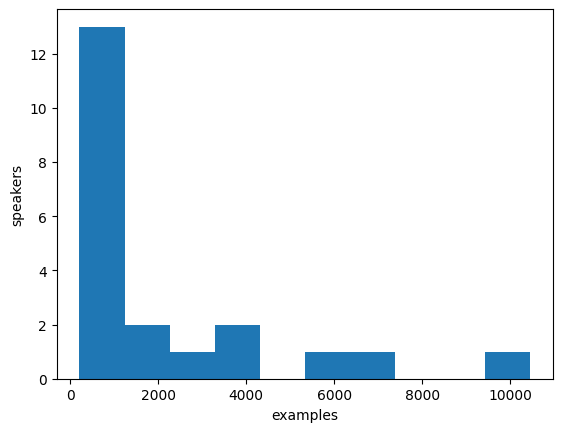

In [ ]:
plt.hist(speaker_counts.values());
plt.ylabel('speakers');
plt.xlabel('examples');

In [ ]:
import os
import torch
import speechbrain
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier

This version of torchaudio is old. SpeechBrain no longer tries using the torchaudio global backend mechanism in recipes, so if you encounter issues, update torchaudio.
This version of torchaudio is old. SpeechBrain no longer tries using the torchaudio global backend mechanism in recipes, so if you encounter issues, update torchaudio.


In [ ]:
spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name),
)

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
def create_speaker_embedding(waveform):
    with torch.no_grad():
        spkr_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        spkr_embeddings = torch.nn.functional.normalize(spkr_embeddings, dim=2)
        spkr_embeddings = spkr_embeddings.squeeze().cpu().numpy()
    return spkr_embeddings

In [ ]:
def prepare_dataset(example):
    audio = example['audio']
    example = processor(
          text = example['sentence'],
          audio_target=audio['array'],
          sampling_rate=audio['sampling_rate'],
          return_attention_mask=False
      )

    example['labels'] = example['labels'][0]
    example['speaker_embeddings'] = create_speaker_embedding(audio['array'])

    return example

In [ ]:
processed_example = prepare_dataset(dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [ ]:
from transformers import SpeechT5ForTextToSpeech

In [ ]:
model = SpeechT5ForTextToSpeech.from_pretrained(
    "microsoft/speecht5_tts"
)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [ ]:
example = dataset[0]
example

{'client_id': 'a1252dd9f1a6c970da7b1a330ad07f9546330b5007dcd8db52ae3ac6774fb3d9150bc117b4df1944d7899d3ab8325cb03217c4797dec1627d1ad83eea7509d41',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/cd45e5a493beab30e15e143c06475a8bab34f392676f2a94a212624fbcd4fe7e/ta_train_0/common_voice_ta_26650298.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/cd45e5a493beab30e15e143c06475a8bab34f392676f2a94a212624fbcd4fe7e/ta_train_0/common_voice_ta_26650298.mp3',
  'array': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  'sampling_rate': 16000},
 'sentence': 'அவரைப் பொதுமக்கள் விடாமல் பின்னாலேயே துரத்திக் கொண்டே ஓடினார்கள்.',
 'up_votes': 2,
 'down_votes': 0,
 'age': 'fifties',
 'gender': 'female',
 'accent': '',
 'locale': 'ta',
 'segment': '',
 'variant': ''}

In [ ]:
speaker_embeddings = torch.tensor(processed_example['speaker_embeddings']).unsqueeze(0)
speaker_embeddings.shape

torch.Size([1, 512])

In [ ]:
text = "I recommend checking the official Hugging Face documentation"
# text = example['sentence']

In [ ]:
inputs = processor(text=text, return_tensors="pt")

In [ ]:
from transformers import SpeechT5HifiGan

vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

In [ ]:
existing_embed_voices = load_dataset('Matthijs/cmu-arctic-xvectors', split='validation[:2%]')
existing_embed_voices

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset cmu-arctic-xvectors downloaded and prepared to /root/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f. Subsequent calls will reuse this data.


Dataset({
    features: ['filename', 'xvector'],
    num_rows: 159
})

In [ ]:
# speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)
speech = model.generate_speech(inputs["input_ids"], torch.tensor(existing_embed_voices[158]['xvector'])[None], vocoder=vocoder)

In [ ]:
ipy.display.Audio(speech.numpy(), rate=16000)

In [ ]:
ipy.display.Audio(example['audio']['array'], rate=16000)

In [ ]:
tokenizer.add_tokens(new_tokens)
len(tokenizer)

149

In [ ]:
def select_speaker(speaker_id):
    return  100 <= speaker_counts[speaker_id] <= 3000

dataset = dataset.filter(select_speaker, input_columns=['client_id'])
len(dataset)

  0%|          | 0/44 [00:00<?, ?ba/s]

13102

In [ ]:
dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)

  0%|          | 0/13102 [00:00<?, ?ex/s]

In [ ]:
def is_not_too_long(input_ids):
  input_length = len(input_ids)
  return input_length < 200

In [ ]:
dataset = dataset.filter(is_not_too_long, input_columns=['input_ids'])
len(dataset)

  0%|          | 0/14 [00:00<?, ?ba/s]

13102

In [ ]:
# dataset = dataset.train_test_split(test_size=0.1)
dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 11791
    })
    test: Dataset({
        features: ['input_ids', 'labels', 'speaker_embeddings'],
        num_rows: 1311
    })
})

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [ ]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [ ]:
from transformers import SpeechT5ForTextToSpeech

model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)
model.resize_token_embeddings(len(tokenizer))

Embedding(149, 768)

In [ ]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(model.generate, use_cache=True)

In [ ]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5-finetuned-tamil",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=100,
    max_steps=1000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=100,
    eval_steps=100,
    logging_steps=25,
    report_to=["wandb"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
    dataloader_num_workers=1,
    dataloader_prefetch_factor=1,
)

In [ ]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
100,0.795700,0.680349
200,0.680000,0.600567
300,0.630500,0.563478
400,0.606700,0.556620
500,0.597900,0.548796
600,0.604600,0.546257
700,0.591300,0.541124
800,0.590500,0.541887
900,0.586800,0.542250
1000,0.580300,0.537213


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.
Some non-default generation parameters are set in the m

TrainOutput(global_step=1000, training_loss=0.6474845380783081, metrics={'train_runtime': 953.6975, 'train_samples_per_second': 33.554, 'train_steps_per_second': 1.049, 'total_flos': 2747218912488864.0, 'train_loss': 0.6474845380783081, 'epoch': 2.71})

In [ ]:
trainer.push_to_hub()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 1876}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be raised to an exception in v4.41.


CommitInfo(commit_url='https://huggingface.co/carlfeynman/speecht5-finetuned-tamil/commit/eb101dc0ff0dc150286702fc6453f6bb381eb57c', commit_message='End of training', commit_description='', oid='eb101dc0ff0dc150286702fc6453f6bb381eb57c', pr_url=None, pr_revision=None, pr_num=None)